In [102]:
#각각의 요소별 생존 확률을 구한다.
#각 성별에 대한 생존 확률
#각 클래스에 대한 생존 확률

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.size'] = 10



plt.rcParams['font.family'] = 'AppleGothic'  # 맥용 폰트
plt.rcParams['font.size'] = 10


In [113]:
#데이터 읽기
df = pd.read_csv('train.csv')
#데이터 프레임의 요약 정보 결측치 확인 #나이 177개 결측치, Cabin 687개 결측치, Embarked 2개 결측치
print(df.isnull().sum())
df.info() #dtypes: float64(2), int64(5), object(5)
print(df.head())

# 탭공백 제거
df.columns = [col.strip() for col in df.columns]

# csv 파일 저장
df.to_csv('train.csv', index=False)




train_df = pd.read_csv('train.csv') #학습 파일
test_df = pd.read_csv('test.csv') #평가 파일



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB
   PassengerId  Survived   

In [104]:
#데이터 프레임 출력
print(df)

     PassengerId  Survived       Pclass  \
1              0         3      "Braund   
2              1         1     "Cumings   
3              1         3   "Heikkinen   
4              1         1    "Futrelle   
5              0         3       "Allen   
..           ...       ...          ...   
887            0         2    "Montvila   
888            1         1      "Graham   
889            0         3    "Johnston   
890            1         1        "Behr   
891            0         3      "Dooley   

                                                  Name      Sex     Age  \
1     Mr. Owen Harris"                             ...   male     22      
2     Mrs. John Bradley (Florence Briggs Thayer)"  ...   female   38      
3     Miss. Laina"                                 ...   female   26      
4     Mrs. Jacques Heath (Lily May Peel)"          ...   female   35      
5     Mr. William Henry"                           ...   male     35      
..                               

In [105]:
# 전체 승객 수
PassengerId = df['PassengerId'].count()
print(f'전체 승객 수 : {PassengerId}')
# 전체 승객 중 생존자 수
print(f'전체 승객 중 생존자 수 : {df["Survived"].sum()}')


전체 승객 수 : 891
전체 승객 중 생존자 수 : 2057


전체 생존자 비율 : 2.308641975308642
생존자 중 여자 생존자 비율: 0.0
생존자 중 남자 생존자 비율: 0.0


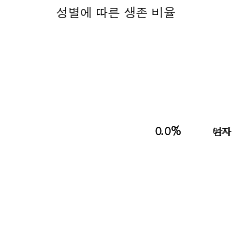

In [108]:
#전체 생존자 비율 생존자 = 1, 사망자 = 0
print(f"전체 생존자 비율 : {df['Survived'].mean()}")

# 생존자만 선택
survived = df[df['Survived'] == 1]
# 사망자만 선택
dead = df[df['Survived'] == 0]

# 생존자 중 남자 여자 비율
female_survived = survived[survived['Sex'] == 'female']
male_survived = survived[survived['Sex'] == 'male']

female_survived_ratio = len(female_survived)/len(survived)
male_survived_ratio = len(male_survived)/len(survived)

print('생존자 중 여자 생존자 비율:', female_survived_ratio)
print('생존자 중 남자 생존자 비율:', male_survived_ratio)

# 성별에 따른 생존 비율 그래프
plt.pie([female_survived_ratio, male_survived_ratio], labels=['여자', '남자'], autopct='%1.1f%%')
plt.title('성별에 따른 생존 비율')
plt.show()

In [107]:
#전체 사망지 비율
print(f"전체 사망자 비율 : {1 - df['Survived'].mean()}")
#

female_dead = dead[dead['Sex'] == 'female']
male_dead = dead[dead['Sex'] == 'male']

female_dead_ratio = len(female_dead)/len(dead)
male_dead_ratio = len(male_dead)/len(dead)

print('전체 사망자 중 여자 사망자  :', len(female_dead)/len(dead))
print('전체 사망자 중 남자 사망자  :', len(male_dead)/len(dead))
#성별에 따른 사망 비율
plt.pie([female_dead_ratio,male_dead_ratio], labels=['여자', '남자'], autopct='%1.1f%%')
plt.title('성별에 따른 사망 비율')
plt.show()


전체 사망자 비율 : -1.308641975308642


ZeroDivisionError: division by zero

등급별 생존 확률 
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


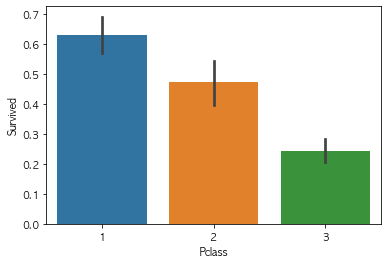

In [ ]:
#좌석 등급별 생존자 비율
#좌석 등급에 따라 생존자 비율이 달라지는지 확인 등급은 총 3가지가 있음

print(f"등급별 생존 확률 \n{df.groupby('Pclass')['Survived'].mean()}")
#좌석 등급별 생존자 비율 시각화
sns.barplot(data=df, x='Pclass', y='Survived')
plt.show()
#그래프로 알 수 있는 것은 1등급이 생존률이 높고 3등급이 낮다
#3등급의 경우 생존률이 25%도 되지 않는다.
#1등급의 경우 생존률이 63%에 달한다.
#좌석 등급에 따라 생존률이 달라지는 것을 알 수 있다.




In [ ]:
#등급별 티켓 가격 

Fare_cleass = df.groupby('Pclass').mean()['Fare']
print(Fare_cleass)


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


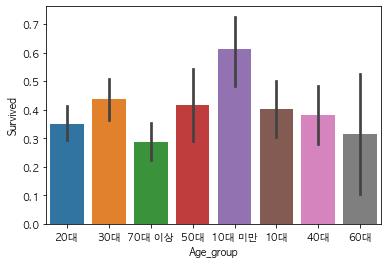

In [ ]:
#나이에 따른 생존 확률
#나이대를 구분 10대 미만 10대 20대 30대 40대 50대 60대 70대 이상

def age_group(age):
    if age < 10:
        return '10대 미만'
    elif age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    elif age < 70:
        return '60대'
    else:
        return '70대 이상'
    
#승객 나이 통계 확인하기
df['Age'].describe()
#승객 나이에 따라 분류하기
df['Age_group'] = df['Age'].apply(age_group)
#승객 나이에 따른 생존 확률
df.groupby('Age_group')['Survived'].mean()
#승객 나이에 따른 생존 확률 시각화
sns.barplot(x='Age_group', y='Survived', data=df)
plt.show()

In [ ]:
#운임비용에 따른 생존율
#운임비용이 높으면 생존율이 높을지에 대해서 Fare를 기준으로 분석
#

df['Fare'].describe()
#5
df['FareBand'] = pd.qcut(df['Fare'], 5)
df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
#200불 이상은 생존율이 높다.

'''print(df['Fare'].min()) #요금에 이상치 있는지 확인 시 0원이 있음

print(df['Fare'].max())'''

df_sorted = df.sort_values(by='Fare', ascending=False)
high_10 = df_sorted.head(10)
low_10 = df_sorted.tail(10)

print(high_10)
print(low_10)



     PassengerId  Survived  Pclass                                   Name  \
258          259         1       1                       Ward, Miss. Anna   
737          738         1       1                 Lesurer, Mr. Gustave J   
679          680         1       1     Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1             Fortune, Miss. Mabel Helen   
27            28         0       1         Fortune, Mr. Charles Alexander   
341          342         1       1         Fortune, Miss. Alice Elizabeth   
438          439         0       1                      Fortune, Mr. Mark   
311          312         1       1             Ryerson, Miss. Emily Borie   
742          743         1       1  Ryerson, Miss. Susan Parker "Suzette"   
118          119         0       1               Baxter, Mr. Quigg Edmond   

        Sex   Age  SibSp  Parch    Ticket      Fare            Cabin Embarked  \
258  female  35.0      0      0  PC 17755  512.3292              NaN   

탑승 항구 별 생존 확률 
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


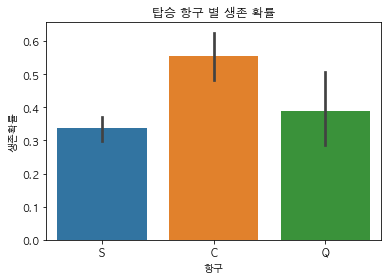

항구 별 가격 평균
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64
항구 별 티켓 등급
Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64


In [ ]:
#탑승 항구에 따라 생존률이 달라지는지 확인


print(f"탑승 항구 별 생존 확률 \n{df.groupby('Embarked')['Survived'].mean()}")
#좌석 등급별 생존자 비율 시각화
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('탑승 항구 별 생존 확률')
plt.xlabel('항구')
plt.ylabel('생존확률')
plt.show()

print(f"항구 별 가격 평균\n{df.groupby('Embarked')['Fare'].mean()}" )
print(f"항구 별 티켓 등급\n{df.groupby('Embarked')['Pclass'].mean()}")

In [ ]:
# Sibsp 과 Parch 0인 경우 혼자 탑승
# 1이상인 경우 동승자 있음

alone = df[df['SibSp'] == 0]
alone = alone[alone['Parch'] == 0]
print(alone['Survived'].value_counts())


#동승자가 있는 경우 생존률이 더 높은지 확인
#동승자가 있는 사람
Sibsp_Parch = df[df['SibSp'] > 0]
Sibsp_parch = Sibsp_Parch[Sibsp_Parch['Parch'] > 0]
print(Sibsp_Parch['Survived'].value_counts())

#동승자가 있는 경우 생존률이 더 높음

0    374
1    163
Name: Survived, dtype: int64
0    151
1    132
Name: Survived, dtype: int64


In [ ]:
#모델 학습 시키기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns


In [ ]:
# 학습 데이터 전처리 (나이 결측치 제거, )
print(train_df)
print(train_df.columns)
if 'Age' in train_df.columns:
    train_df = train_df.dropna(subset=['Age'])
else:
    print("데이터프레임에 'Age' 열이 존재하지 않습니다.")
'''
train_df = train_df.dropna(subset=['Age'])

# 데이터셋을 훈련셋과 테스트셋으로 나눔
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = RandomForestClassifier()
model.fit(X, Y)

#모델 평가
y_pred = model.predict(X)'''


     PassengerId  Survived       Pclass  \
1              0         3      "Braund   
2              1         1     "Cumings   
3              1         3   "Heikkinen   
4              1         1    "Futrelle   
5              0         3       "Allen   
..           ...       ...          ...   
887            0         2    "Montvila   
888            1         1      "Graham   
889            0         3    "Johnston   
890            1         1        "Behr   
891            0         3      "Dooley   

     Name                                                                                  \
1     Mr. Owen Harris"                             ...                                      
2     Mrs. John Bradley (Florence Briggs Thayer)"  ...                                      
3     Miss. Laina"                                 ...                                      
4     Mrs. Jacques Heath (Lily May Peel)"          ...                                      
5     Mr. William 

"\ntrain_df = train_df.dropna(subset=['Age'])\n\n# 데이터셋을 훈련셋과 테스트셋으로 나눔\nX = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)\ny = train_df['Survived']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n\n\nmodel = RandomForestClassifier()\nmodel.fit(X, Y)\n\n#모델 평가\ny_pred = model.predict(X)"